In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## 1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки pandas.

In [ ]:
df = pd.read_csv(filepath_or_buffer='diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Как наблюдения (объекты) распределились по классам? Сколько наблюдений в каждом классе? Для ответа на вопрос используйте метод

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 3. Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Обучите линейную SVM-модель с помощью класса SVC из sklearn.svm:

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

## 5. Оцените качество модели на тестовой выборке. Используйте для этого функцию classification_report.

In [ ]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

## У МОДЕЛИ НЕ ОЧЕНЬ ВЫСОКАЯ ТОЧНОСТЬ

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



## 6. Стандартизируйте данные и постройте модель на стандартизированных данных. Используйте для стандартизации класс StandardScaler. Оцените качество модели с помощью classification_report.

In [ ]:
standardizer = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
standardizer.fit(X_train, y_train)
y_pred_standardized = standardizer.predict(X_test)
print("\nРезультат со стандартизацией:")
print(classification_report(y_test, y_pred_standardized))

## МОДЕЛЬ СТАЛА НЕМНОГО БОЛЬШЕ ПРАВИЛЬНО ПРОГНОЗИРОВАТЬ, НО РЕЗУЛЬТАТ ОСТАВЛЯЕТ ЖЕЛАТЬ ЛУЧШЕГО


Результат со стандартизацией:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## 7. Помните ли вы такой способ оценки качества модели как перекрестная проверка? Воспользуйтесь перекрестной проверкой, чтобы оценить качество моделей. Используйте функцию cross_val_score.

In [ ]:
svm = SVC()
print(cross_val_score(standardizer, X, y, cv=5, scoring='accuracy'))

## РАЗБРОС МЕЖДУ ФОЛДАМИ НЕВЕЛЕЛИК, МОДЕЛЬ ДОСТАТОЧНО СТАБИЛЬНО РАБОТАЕТ НА ВСЕХ ЧАСТЯ

[0.76623377 0.75324675 0.74675325 0.81699346 0.77777778]


## 8. Попробуйте изменить (уменьшить, затем увеличить) значение гиперпараметра С. За что он отвечает? Как он влияет на качество модели в рассмотренном примере?

In [ ]:
for C in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"C={C}")
    print(classification_report(y_test, y_pred))


## Гиперпараметр  C  контролирует баланс между точностью классификации тренировочных данных и
##    степенью обобщения модели (способностью правильно классифицировать новые данные).

## В данном примере в целом гиперпараметр С никак не влияет на качество модели

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
C=0.01
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       151
           1       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

C=0.1
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231

C=1
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accurac

## 9. Постройте модель с ядром kernel='rbf'. Как это повлияло на качество модели?

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))


## Немного улучшились показатели

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



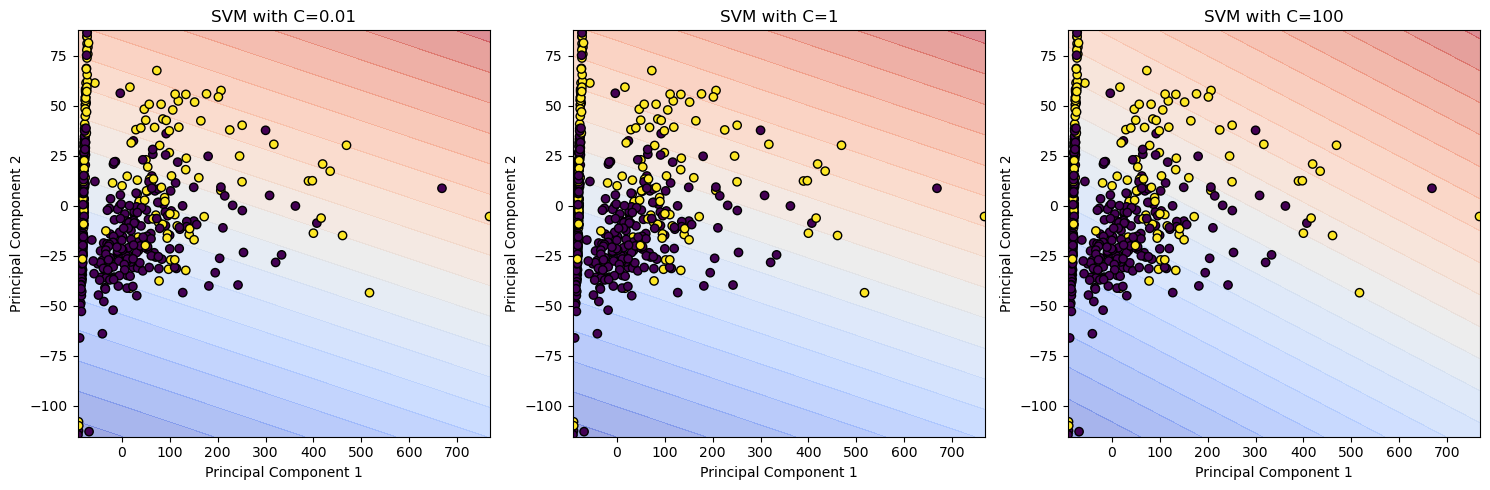

In [ ]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

C_values = [0.01, 1, 100]
plt.figure(figsize=(15, 5))
for i, C in enumerate(C_values, 1):
    # Обучение SVM
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_2D, y_train)

    # Построение сетки для отображения гиперплоскости
    xx, yy = np.meshgrid(np.linspace(X_train_2D[:, 0].min()-1, X_train_2D[:, 0].max()+1, 100),
                         np.linspace(X_train_2D[:, 1].min()-1, X_train_2D[:, 1].max()+1, 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение графика
    plt.subplot(1, len(C_values), i)
    plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.5)
    plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k')
    plt.title(f"SVM with C={C}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

В большинстве случаев PCA — оптимальный выбор для линейной модели, поскольку он сохраняет глобальную структуру данных и упрощает
визуализацию линейных разделяющих гиперплоскостей.